In [ ]:
import keras
import numpy as np
import cv2
import os
import csv
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
#from imutils import paths
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import tensorflow_hub as hub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath="/home/student/100vids/videos/training"

In [ ]:
Accident_Labels=set(["positive","negative"])
data=[]
labels=[]
for root, dirs, files in os.walk(datapath):
    for file in files:
        if file.endswith(".mp4"):
            label = os.path.basename(root)
            if label in Accident_Labels:
                image_path = os.path.join(root, file)
                data.append(image_path)
                labels.append(label)

In [ ]:
print(len(data))

1284


In [ ]:
a=data
id=[]
for i in a:
  vid_name=i[-10:-4]
  id.append(str(vid_name))
#(id,labels)
len(id),len(labels)

(1284, 1284)

In [ ]:
df1=pd.DataFrame({"VideoId":id,"Label":labels},dtype=str)
df1.to_csv("/home/student/100vids/videos/dataset1.csv",index=False)

In [ ]:
df2=pd.read_csv("/home/student/100vids/videos/dataset1.csv",dtype={"VideoId":str})
df2

,VideoId,Label
0,000380,negative
1,000187,negative
2,000712,negative
3,000780,negative
4,000295,negative
...,...,...
1279,000428,positive
1280,000153,positive
1281,000423,positive
1282,000429,positive


In [ ]:
#Frame rate
import cv2

video_path = "/content/drive/MyDrive/Cap100/data/positive/000100.mp4"
cap = cv2.VideoCapture(video_path)

frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
print(f"Frame rate of the video: {frame_rate} fps")

cap.release()


Frame rate of the video: 25 fps


In [ ]:
###### DONT RUN THIS CELL
# Extracting frames
def extract_frames(video_path, output_folder, id, label, num_frames=10):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(total_frames // num_frames, 1)

    count = 0
    frame_count = 0

    while count < num_frames:
        video.set(cv2.CAP_PROP_POS_FRAMES, frame_count)

        success, frame = video.read()

        if not success:
            break

        frame_path = os.path.join(output_folder, f"{id}_{label}_{count}.jpg")
        cv2.imwrite(frame_path, frame)

        frame_count += frame_interval
        count += 1

    video.release()

video_folder = "/home/student/100vids/videos/training/positive"
#video_folder = "/home/student/100vids/videos/training/negative"

output_folder = "/home/student/100vids/videos/training_frames"

num_videos = 100
processed_videos = 0

for filename in os.listdir(video_folder):
    if filename.endswith(".mp4"):
        video_path = os.path.join(video_folder, filename)

        #id, label = filename.split("_")[:2]
        label,id=video_path.split("/")[-2:]
        id=id[:6]

        extract_frames(video_path, output_folder, id, label, num_frames=10)
        processed_videos += 1
        print(processed_videos)
        ##END
        if processed_videos == num_videos:
            break


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


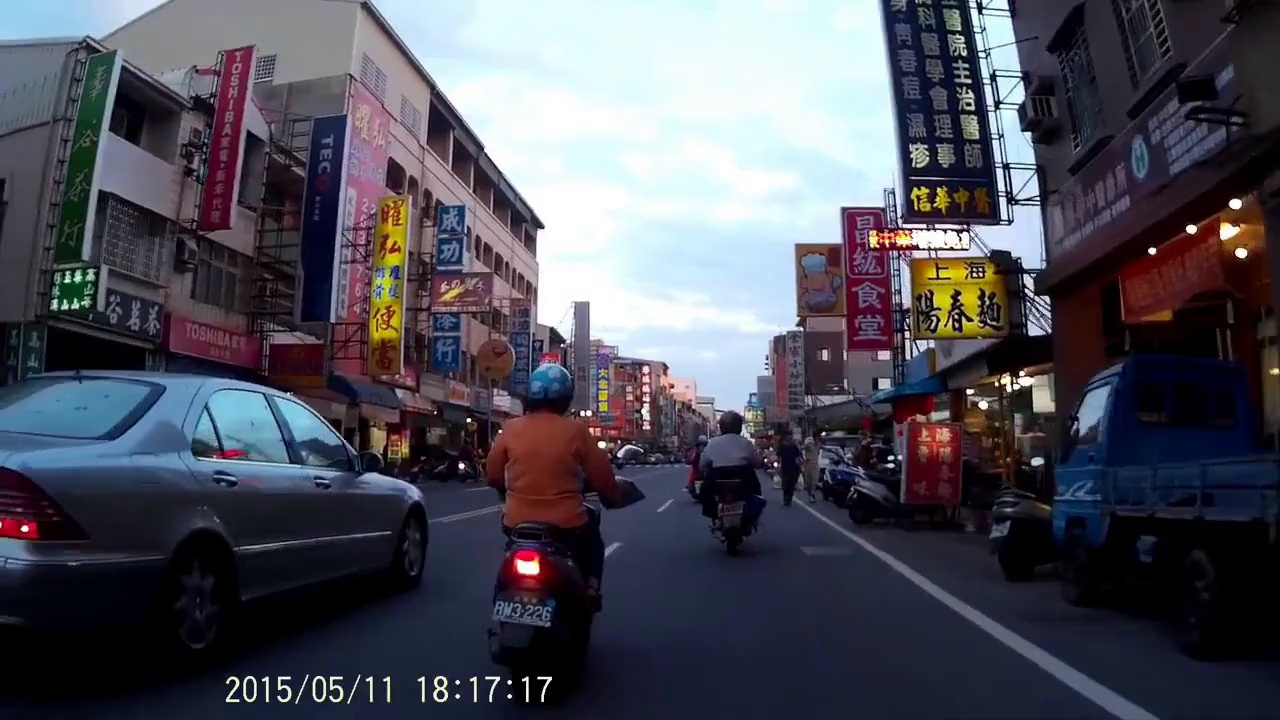

In [ ]:
from IPython.display import Image
Image("/home/student/100vids/videos/training_frames/000033_positive_0.jpg")

In [ ]:
frames_folder = "/home/student/100vids/videos/training_frames"
output_csv = "/home/student/100vids/videos/dataset2.csv"

metadata = []
for filename in os.listdir(frames_folder):
    if filename.endswith(".jpg"):
        frame_path = os.path.join(frames_folder, filename)

        id, label, count = filename.split("_")[:3]
        count=count.strip(".jpg")
        metadata.append([id, label, count])

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'label', 'count'])
    writer.writerows(metadata)

print("CSV file created successfully.")

CSV file created successfully.


In [ ]:
IMG_SIZE=224

def process_image(image_path):
  image=tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

In [ ]:
df3=pd.read_csv("/home/student/100vids/videos/dataset2.csv",dtype={"id":str})
df3

,id,label,count
0,000286,positive,6
1,000086,positive,8
2,000028,positive,5
3,000635,negative,7
4,000425,negative,8
...,...,...,...
1995,000033,negative,8
1996,000786,negative,8
1997,000509,negative,1
1998,000597,negative,5


In [ ]:
filenames = [
    "/home/student/100vids/videos/training_frames/" +
    id + "_" + label + "_" + str(count) + ".jpg"
    for id, label, count in zip(df3["id"], df3["label"], df3["count"])]

In [ ]:
accident_frames = []
non_accident_frames = []

c1=0
c2=0
for file_name in filenames:
  if 'positive' in file_name:
    frame=process_image(file_name)
    accident_frames.append(frame)
    c1+=1
    print(c1)
  elif 'negative' in file_name:
    frame=process_image(file_name)
    non_accident_frames.append(frame)
    c2+=1
    print(c2)

1
2
3
1
2
3
4
5
4
5
6
7
8
9
6
10
7
11
12
13
8
14
15
9
10
11
16
17
18
12
19
20
13
21
22
14
23
15
24
16
25
17
18
19
20
26
27
21
28
22
29
23
24
25
30
31
32
26
33
27
34
35
28
36
29
37
30
38
39
31
40
32
33
34
41
42
43
35
44
36
37
38
39
45
46
47
48
40
49
41
50
51
42
52
53
43
44
45
46
54
55
47
56
48
57
49
50
58
51
52
59
53
60
54
61
62
55
56
57
58
59
60
61
63
64
62
63
64
65
66
65
66
67
67
68
68
69
70
71
72
73
69
70
71
74
72
75
76
73
74
77
78
79
80
81
82
83
75
84
76
85
86
87
88
89
90
77
78
79
91
80
81
92
93
82
83
94
84
95
85
96
86
97
87
98
88
99
89
100
90
91
101
92
93
94
102
95
96
103
97
104
98
99
105
100
106
107
108
109
110
101
102
103
111
112
113
104
105
106
114
107
108
115
116
117
109
118
110
111
119
120
112
113
114
115
116
117
121
118
119
122
123
124
125
120
121
126
127
128
122
129
123
130
124
125
131
132
133
134
126
135
127
136
128
137
138
139
140
129
130
131
141
142
132
133
143
134
144
145
146
135
136
147
137
148
149
138
139
140
141
142
150
143
144
145
146
147
148
149
150
151
152
151
153


In [ ]:
##### DONT RUN THIS CELL
### TO SAVE INTERMEDIATE RESULTS
#dataset = tf.data.Dataset.from_tensor_slices(accident_frames)
dataset = tf.data.Dataset.from_tensor_slices(non_accident_frames)

save_path = "/home/student/100vids/videos/non_accident_tensors"
tf.data.experimental.save(dataset, save_path)

In [ ]:
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
len(dataset)

1000

In [ ]:
import tensorflow as tf
#load_path = "/home/student/100vids/videos/accident_tensors"
load_path = "/home/student/100vids/videos/non_accident_tensors"
loaded_dataset = tf.data.experimental.load(load_path)

#normalized_accident_frames = []
normalized_non_accident_frames=[]

for image_tensor in loaded_dataset:
    #normalized_accident_frames.append(image_tensor)
    normalized_non_accident_frames.append(image_tensor)

#print(len(normalized_accident_frames))
#print(len(normalized_non_accident_frames))

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 12348106414654152878
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 12348106414654152878


In [ ]:
normalized_non_accident_frames[1]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.64088637, 0.6644158 , 0.65657264],
        [0.7008103 , 0.7243397 , 0.7164966 ],
        [0.7456082 , 0.7691377 , 0.7612945 ],
        ...,
        [0.19406712, 0.19406712, 0.19406712],
        [0.16103435, 0.16103435, 0.16103435],
        [0.15294118, 0.15294118, 0.15294118]],

       [[0.6092037 , 0.6327331 , 0.62488997],
        [0.6693177 , 0.69284713, 0.685004  ],
        [0.6362745 , 0.6598039 , 0.6519608 ],
        ...,
        [0.18404354, 0.18404354, 0.18404354],
        [0.15695277, 0.15695277, 0.15695277],
        [0.15294118, 0.15294118, 0.15294118]],

       [[0.6857744 , 0.7093038 , 0.70146066],
        [0.7696379 , 0.79316735, 0.7853242 ],
        [0.6247799 , 0.6483093 , 0.64046615],
        ...,
        [0.16568601, 0.16568601, 0.16568601],
        [0.15125047, 0.15125047, 0.15125047],
        [0.15504202, 0.15504202, 0.15504202]],

       ...,

       [[0.23135786, 0.2512462 , 0.34718442],
        [0.28

In [ ]:
target_size = (224, 224)
sequence_length = 10

In [ ]:
def create_input_sequences(frames, sequence_length):
    num_frames = len(frames)
    input_sequences = []
    for i in range(0, num_frames, sequence_length):
        if i + sequence_length <= num_frames:
            input_sequence = frames[i:i+sequence_length]
            input_sequences.append(input_sequence)
    return input_sequences

In [ ]:
accident_input_sequences = create_input_sequences(normalized_accident_frames, sequence_length)
non_accident_input_sequences = create_input_sequences(normalized_non_accident_frames, sequence_length)

In [ ]:
len(accident_input_sequences),len(non_accident_input_sequences)

(100, 100)

In [ ]:
train_accident_sequences = accident_input_sequences[:80]
valid_accident_sequences = accident_input_sequences[80:]
train_non_accident_sequences = non_accident_input_sequences[:80]
valid_non_accident_sequences = non_accident_input_sequences[80:]
len(train_accident_sequences),len(valid_accident_sequences)

(80, 20)

In [ ]:
train_sequences = train_accident_sequences + train_non_accident_sequences
valid_sequences = valid_accident_sequences + valid_non_accident_sequences

In [ ]:
# Convert the sequences to numpy arrays because the model accepts input as an array
train_data = np.array(train_sequences)
valid_data = np.array(valid_sequences)

In [ ]:
train_data.shape

(160, 10, 224, 224, 3)

In [ ]:
len(train_data),len(valid_data)



(160, 40)

In [ ]:
train_labels = np.array([1] * len(train_accident_sequences) + [0] * len(train_non_accident_sequences))
valid_labels = np.array([1] * len(valid_accident_sequences) + [0] * len(valid_non_accident_sequences))

In [ ]:
import pickle
# Saving the array
with open('/home/student/videos/train_data.pkl', 'wb') as file:
    pickle.dump(train_data, file)
with open('/home/student/videos/valid_data.pkl', 'wb') as file:
    pickle.dump(valid_data, file)
with open('/home/student/videos/train_labels.pkl', 'wb') as file:
    pickle.dump(train_labels, file)
with open('/home/student/videos/valid_labels.pkl', 'wb') as file:
    pickle.dump(valid_labels, file)

In [ ]:
#####run from heere
import pickle
with open('/home/student/videos/train_data.pkl', 'rb') as file:
    train_data = pickle.load(file)
with open('/home/student/videos/valid_data.pkl', 'rb') as file:
    valid_data = pickle.load(file)
with open('/home/student/videos/train_labels.pkl', 'rb') as file:
    train_labels = pickle.load(file)
with open('/home/student/videos/valid_labels.pkl', 'rb') as file:
    valid_labels = pickle.load(file)

In [ ]:
train_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
len(train_data),len(valid_data)

(160, 40)

In [ ]:
import tensorflow as tf

2023-11-02 10:33:45.093414: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 10:33:45.107024: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 10:33:45.230385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 10:33:45.231269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 10:33:46.152320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=(10, 224, 224, 3)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(BatchNormalization())
model.add(Conv3D(16, (3, 3, 3), activation='relu'))
model.add(MaxPooling3D((2, 2, 2)))
model.add(BatchNormalization())

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers with dropout and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Output layer with 'sigmoid' activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



2023-11-02 12:18:35.853977: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 12:18:35.868188: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 12:18:36.006944: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 12:18:36.008859: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 12:18:36.853834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 8, 222, 222, 32)   2624      
                                                                 
 max_pooling3d (MaxPooling3  (None, 4, 111, 111, 32)   0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 4, 111, 111, 32)   128       
 Normalization)                                                  
                                                                 
 conv3d_1 (Conv3D)           (None, 2, 109, 109, 16)   13840     
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 1, 54, 54, 16)     0         
 g3D)                                                            
                                                        

In [ ]:
import numpy as np

train_data = np.array(train_data)
valid_data = np.array(valid_data)

print(train_data.shape)
print(valid_data.shape)

history = model.fit(
    train_data, train_labels,
    epochs=10, batch_size=10,
    validation_data=(valid_data, valid_labels)
)


(160, 10, 224, 224, 3)
(40, 10, 224, 224, 3)
Epoch 1/10
16/16 [==============================] - 10s 534ms/step - loss: 6.3208 - accuracy: 0.5437 - val_loss: 2.3662 - val_accuracy: 0.5750
Epoch 2/10
16/16 [==============================] - 8s 517ms/step - loss: 2.9647 - accuracy: 0.7937 - val_loss: 2.5784 - val_accuracy: 0.6250
Epoch 3/10
16/16 [==============================] - 8s 517ms/step - loss: 2.5323 - accuracy: 0.8125 - val_loss: 2.8014 - val_accuracy: 0.5750
Epoch 4/10
16/16 [==============================] - 8s 529ms/step - loss: 2.2782 - accuracy: 0.7937 - val_loss: 4.0244 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 8s 521ms/step - loss: 2.1888 - accuracy: 0.8500 - val_loss: 3.3707 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 8s 517ms/step - loss: 1.8789 - accuracy: 0.9187 - val_loss: 4.7921 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 8s 517ms/step - loss: 1.7582 - accuracy: 0.9375 - 

In [ ]:
import datetime
import tensorflow_hub as hub

In [ ]:
IMG_SIZE=224

def process_image(image_path):
  image=tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

In [ ]:
def save_model(model,suffix=None):
    modeldir=os.path.join("/home/student/videos/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
    model_path=modeldir + "-" + suffix + ".h5"
    model.save(model_path)
    return model_path

In [ ]:
def load_model(model_path):
    model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [ ]:
save_model(model,suffix="On-100-videos")

/home/student/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/home/student/videos/models/20231102-12231698907993-On-100-videos.h5'

In [ ]:
###### RUNNNNN FROMM HEREEEEE
from tensorflow.keras.models import load_model
loaded_model=load_model('/content/drive/MyDrive/Cap100/models/20231102-12231698907993-On-100-videos.h5')

In [ ]:
def preprocess_frame(frame):
    # Resize the frame to the desired input size (e.g., 224x224)
    resized_frame = cv2.resize(frame, (224, 224))

    # Normalize the pixel values to the range [0, 1]
    normalized_frame = resized_frame / 255.0

    return normalized_frame


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Cap100/models/20231102-12231698907993-On-100-videos.h5')

# Load and preprocess the video
video_path = '/content/drive/MyDrive/Cap100/data/positive/000094.mp4'
#video_path = '/content/drive/MyDrive/Cap100/data/negative/000085.mp4'
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create a list to store preprocessed frames
frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    frames.append(preprocessed_frame)

    if len(frames) == 10:  # Assuming your model expects sequences of 32 frames
        # Make predictions on the sequence
        sequence = np.array(frames)  # Convert the list of frames to a NumPy array
        sequence = np.expand_dims(sequence, axis=0)  # Add a batch dimension
        prediction = model.predict(sequence)

        # You can now use 'prediction' to make decisions based on your model's output
        #print(f'Prediction for this sequence: {prediction}')
cap.release()
cv2.destroyAllWindows()

if prediction >0.00001:
    print(prediction)
    print("Accident")
else:
    print(prediction)
    print("Non-Accident")


1/1 [==============================] - 0s 444ms/step
[[3.21561e-05]]
Accident


2/2 [==============================] - 1s 105ms/step
Accuracy: 0.875
Precision: 0.8260869565217391
Recall: 0.95
F1-Score: 0.8837209302325583


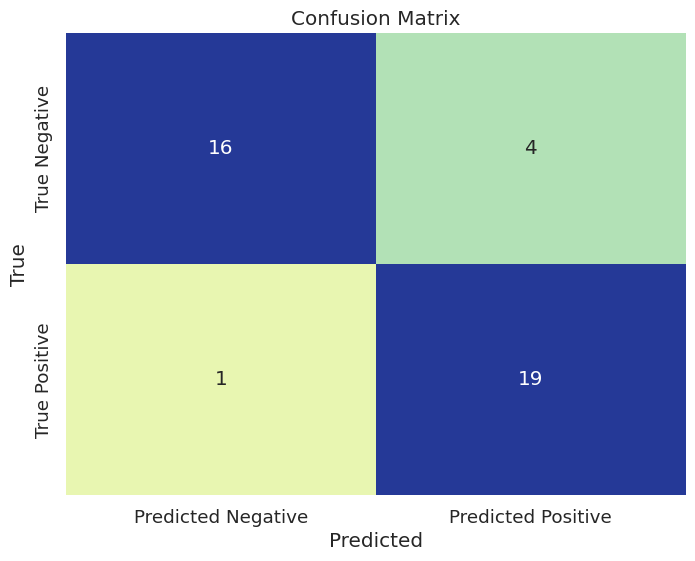

In [ ]:
#### For testing
# Make predictions on the test data
import matplotlib.pyplot as plt
import seaborn as sns
predicted_values=[]
model = load_model('/content/drive/MyDrive/Cap100/models/20231102-12231698907993-On-100-videos.h5')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(valid_data)


# Apply a threshold to the predicted probabilities to convert them into binary predictions
# For example, you can use a threshold of 0.9
y_pred_binary = (y_pred > 0.00001).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(valid_labels, y_pred_binary)
precision = precision_score(valid_labels, y_pred_binary)
recall = recall_score(valid_labels, y_pred_binary)
f1 = f1_score(valid_labels, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(valid_labels, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
cmap = sns.color_palette("YlGnBu")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2/2 [==============================] - 1s 106ms/step


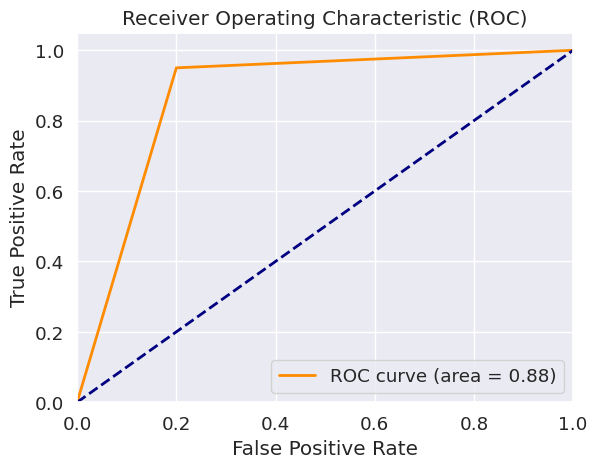

In [ ]:
# Make predictions on the test data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(valid_data)
y_pred_binary = (y_pred > 0.00001).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(valid_labels, y_pred_binary)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.245.118.97


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 33f490f3a216fb1

npx: installed 22 in 6.361s
your url is: https://orange-pumas-grow.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.118.97:8501

2023-11-06 18:06:55.982589: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 18:06:55.982658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 18:06:55.982706: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 18:06:55.997603: I tensorflow/core/platform/cpu_feature_